### 1. Types of supervised learning
 - __Classification:__ Predict a categorical response
 - __Regression:__ Predict a continuous response

## Reading data

In [1]:
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('./Advertising.csv', index_col=0)
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
# display the first 5 rows
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
data.shape

(200, 4)

What are the features?
 - TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
 - Radio: advertising dollars spent on Radio
 - Newspaper: advertising dollars spent on Newspaper

What is the response?
 - Sales: sales of a single product in a given market (in thousands of items)

What else do we know?
 - Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

## Visualizing, Exploring

In [4]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

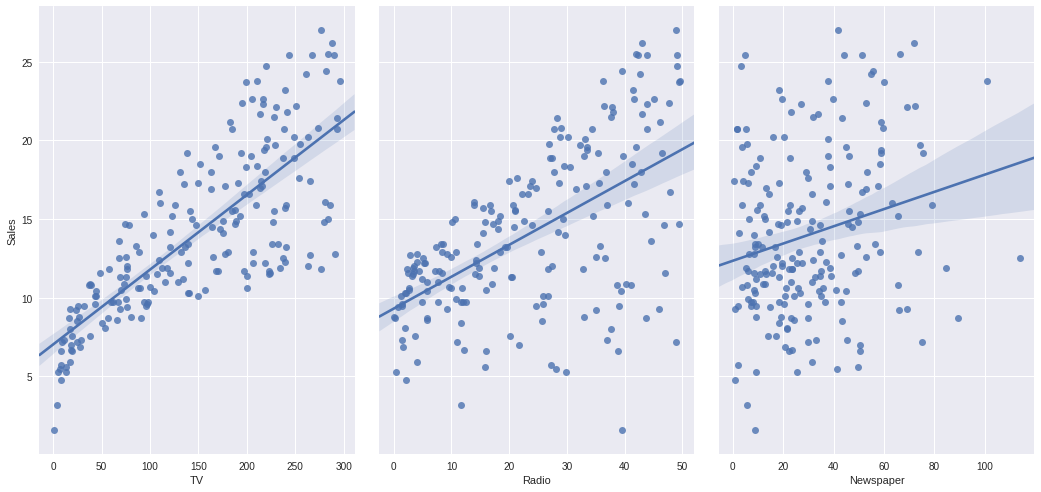

In [5]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

Linear regression
 - Strong relationship between TV ads and sales
 - Weak relationship between Radio ads and sales
 - Very weak to no relationship between Newspaper ads and sales

## 4. Linear regression Pros and Cons
#### Pros:
 - Fast
 - No tuning required
 - Highly interpretable
 - Well-understood
 
#### Cons:
 - Unlikely to produce the best predictive accuracy
 - Presumes a linear relationship between the features and response
 - If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate

## 5. Form of linear regression

In [6]:
%%latex

$$\gamma=\beta_{0}+\beta_{1}\chi_{1}+\beta_{2}\chi_{2}+...+\beta_{n}\chi_{n}$$

 - $\gamma$  is the response  $$$$
 - $\beta_{0}$  is the intercept  $$$$
 - $\beta_{1}$  is the coefficient for $\chi_{1}$  (the first feature)  $$$$
 - $\beta_{n}$ is the coefficient for  $\chi_{n}$  (the $_{n}$th feature)  $$$$


In this case:$$$$
$$\gamma=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspapery$$

The  $\beta$  values are called the model coefficients$$$$
These values are "learned" during the model fitting step using the "least squares" criterion$$$$
Then, the fitted model can be used to make predictions$$$$


<IPython.core.display.Latex object>

## 6. Preparing X and y using pandas

 - scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
 - However, pandas is built on top of NumPy
 - Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## 7. Splitting X and y into training and testing sets

In [11]:
# import  
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## 8. Linear regression in scikit-learn

In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


## 9. Interpreting model coefficients

In [15]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
for k,v in zip(feature_cols, linreg.coef_):
    print ("%s %s" % (k, v))

TV 0.0465645678742
Radio 0.179158122451
Newspaper 0.00345046471118


In [16]:
%%latex
$\gamma=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper$

<IPython.core.display.Latex object>

__How do we interpret the TV coefficient (0.0466)?__

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:
 - This is a statement of association, not causation
 - If an increase in TV ad spending was associated with a decrease in sales,  β1β1  would be negative.

## 10. Making predictions

In [17]:
X_test.head()

TV  Radio  Newspaper
59   210.8   49.6       37.7
41   202.5   22.3       31.6
35    95.7    1.4        7.4
103  280.2   10.1       21.4
185  253.8   21.3       30.0

In [18]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [19]:
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

In [20]:
data.ix[[59, 41, 35, 103, 185]]

TV  Radio  Newspaper  Sales
59   210.8   49.6       37.7   23.8
41   202.5   22.3       31.6   16.6
35    95.7    1.4        7.4    9.5
103  280.2   10.1       21.4   14.8
185  253.8   21.3       30.0   17.6

We need an evaluation metric in order to compare our predictions with the actual values.

## 11. Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [21]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

__Mean Absolute Error (MAE)__ is the mean of the absolute value of the errors

In [22]:
%%latex
$\frac{1}{2}\sum_{i=1}^{n}\mid \gamma_{i}-\hat{\gamma}_{i}\mid$

<IPython.core.display.Latex object>

In [23]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


__Mean Squared Error (MSE)__ is the mean of the squared errors

In [24]:
%%latex
$\frac{1}{2}\sum_{i=1}^{n}\left( \gamma_{i}-\hat{\gamma}_{i} \right)^2$

<IPython.core.display.Latex object>

In [25]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


__Root Mean Squared Error (RMSE)__ is the square root of the mean of the squared errors

In [26]:
%%latex
$\sqrt{\frac{1}{2}\sum_{i=1}^{n}\left( \gamma_{i}-\hat{\gamma}_{i} \right)^2}$

<IPython.core.display.Latex object>

In [27]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
 - MAE is the easiest to understand, because it's the average error.
 - MSE is more popular than MAE, because MSE "punishes" larger errors.
 - RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
 - Easier to put in context as it's the same units as our response variable

## 12. Computing the RMSE for our Sales predictions

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## 13. Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [29]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.38790346994


In [30]:
d = {'TV': [1000], 'Radio': [300]}
mytest = pd.DataFrame(d)

In [31]:
linreg.predict(mytest)

array([ 198.08753156])

The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## 14. Resources

__Linear regression:__
[Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by Data School
Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
[Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by Data School
[Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

__Pandas:__
[Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
[read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

__Seaborn:__
[Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
[Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)

[ritchieng](https://www.ritchieng.com/machine-learning-linear-regression/)